In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the required dataset
train = pd.read_csv('Hackathon/train.csv/train.csv')

train.head(2)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [3]:
test = pd.read_csv('Hackathon/test.csv/test.csv')

test.head(2)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,...,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,...,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0


In [4]:
ss = pd.read_csv('Hackathon/sample_submission.csv')

In [5]:
ss.head(2)

,customer_id,subscribed
0,customer_id_32884,1
1,customer_id_3169,1


## Basic EDA

In [6]:
train.shape

(28831, 22)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     28831 non-null  object 
 1   age             28831 non-null  int64  
 2   job             28831 non-null  object 
 3   marital         28831 non-null  object 
 4   education       28831 non-null  object 
 5   default         28831 non-null  object 
 6   housing         28831 non-null  object 
 7   loan            28831 non-null  object 
 8   contact         28831 non-null  object 
 9   month           28831 non-null  object 
 10  day_of_week     28831 non-null  object 
 11  duration        28831 non-null  float64
 12  campaign        28831 non-null  int64  
 13  pdays           28831 non-null  int64  
 14  previous        28831 non-null  int64  
 15  poutcome        28831 non-null  object 
 16  emp_var_rate    28831 non-null  float64
 17  cons_price_idx  28831 non-null 

In [8]:
# from pandas_profiling import ProfileReport

In [9]:
# train.profile_report()

## Graphical EDA

#### Univariate Analysis

<AxesSubplot:xlabel='subscribed', ylabel='count'>

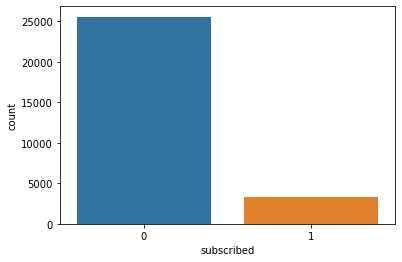

In [10]:
sns.countplot(x = train['subscribed'])

<AxesSubplot:xlabel='education', ylabel='subscribed'>

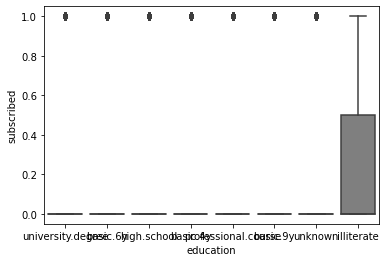

In [11]:
sns.boxplot(x = 'education', y = 'subscribed', data = train)

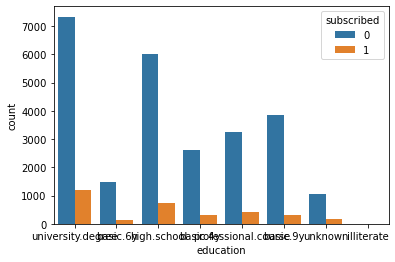

In [12]:
sns.countplot(x = 'education', hue = 'subscribed', data = train)

plt.show()

In [14]:
train = train.drop('customer_id', axis = 1)
test = test.drop('customer_id', axis = 1)

### Encoding Categorical Data

In [15]:
train = pd.get_dummies(train)

train.head(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,1.283333,3,999,1,-2.97,46.3565,-23.10,1.711,5023.5,...,0,0,0,1,0,0,0,1,0,0
1,31,0.200000,4,999,0,-1.77,46.4465,-32.34,2.252,5099.1,...,0,0,1,0,0,0,0,0,1,0


In [16]:
test = pd.get_dummies(test)

test.head(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,59,6.183333,1,999,1,-1.77,46.4465,-32.34,2.301,5099.1,...,0,0,0,1,0,0,0,1,0,0
1,57,4.750000,2,999,0,1.13,46.9970,-25.48,5.862,5191.0,...,0,0,0,0,1,0,0,0,1,0


## Categorizing the data into features(X) and target(y)

In [17]:
X = train.drop('subscribed', axis = 1)

y = train['subscribed']

### Splitting the dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1234)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23064, 63)
(5767, 63)
(23064,)
(5767,)


## XGBOOST

In [20]:
from xgboost import XGBClassifier

xgboostmodel = XGBClassifier(use_label_encoder=False)

xgbboostmodel = xgboostmodel.fit(X_train, y_train)

[13:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
xgbboostmodel_prediction = xgboostmodel.predict(X_test)

In [25]:
Xgboost = xgbboostmodel.predict(test)

In [27]:
ss['subscribed'] = Xgboost

In [28]:
ss.to_csv('xgboost.csv', index = False)

## Logistic Regression

In [19]:
# importing the logistic regression algorithm
from sklearn.linear_model import LogisticRegression

In [20]:
# Instanciating the model
log_reg = LogisticRegression()

In [21]:
# Fit the model
log_reg.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Predict using the model
y_pred = log_reg.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy score and F1 score

In [24]:
from sklearn.metrics import accuracy_score, f1_score

In [25]:
# checking accuracy score
accuracy_score(y_test, y_pred)

0.9065371943818277

In [26]:
# checking f1 score
f1_score(y_test, y_pred)

0.47208619000979435

In [27]:
# Using the model to predict, because the f1 score is low, the model will not probably do very great
log_reg_pred_2 = log_reg.predict(test)

In [28]:
log_reg_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
ss.head()

,customer_id,subscribed
0,customer_id_32884,1
1,customer_id_3169,1
2,customer_id_32206,1
3,customer_id_9403,1
4,customer_id_14020,1


In [60]:
# creating a submission file. 
# To do that, we need to access the series 'subscribed' from the ss dataframe and assign it to our prediction
ss['subscribed'] = log_reg_pred_2

In [61]:
# whenever a dataframe is created, it automatically generates index numbers,
# therefore we need to ignore it in order to be able to submit correctly
ss.to_csv('log_reg_second.csv', index= False)

## Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

randomforestmodel = RandomForestClassifier()

randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# evaluating the model
random_forest_pred = randomforestmodel.predict(X_test)

In [32]:
random_forest_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# Evaluating the accuracy score
rand_acc_score = accuracy_score(y_test, random_forest_pred)

rand_acc_score

0.9106988035373678

In [37]:
# Evaluating the f1 score
rand_f1_score = f1_score(y_test, random_forest_pred)

rand_f1_score

0.5227062094531973

In [33]:
# Using the model to predict
# NOTE that when you are predicting, you are using the test dataset given initially
rand_model_pred = randomforestmodel.predict(test)

In [34]:
rand_model_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
# it is neccessary for us to read in the submission file again,
# because in the first model we created, we have mutilated the 'subsccribed' series in the ss dataframe
ss = pd.read_csv('Hackathon/sample_submission.csv')

In [67]:
ss['subscribed'] = rand_model_pred

In [68]:
ss.to_csv('randomforest.csv', index=False)

## KNN Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
# evaluating the model
kneighbor_pred = knn.predict(X_test)

In [42]:
kneighbor_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
# Checking the accuracy score
knn_acc_score = accuracy_score(y_test, kneighbor_pred)

knn_acc_score

0.9054967920929426

In [46]:
# Checking the f1 score
knn_f1_score = f1_score(y_test, kneighbor_pred)

knn_f1_score

0.5321888412017167

In [43]:
# Using the model to predict
# NOTE, when predicting, we make use of the original test dataset
knn_pred = knn.predict(test)

In [44]:
knn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
# NOTE, we need to read in this cell again, because we had mutilated the 'subscribed' series in the initial model created
ss = pd.read_csv('Hackathon/sample_submission.csv')

In [76]:
# assign the 'subscribed' series to knn_pred(which is the output of the model created)
ss['subscribed'] = knn_pred

In [77]:
ss.to_csv('knn_model.csv', index= False)

## Gradient Boost Classifier

In [21]:
from sklearn.metrics import accuracy_score, f1_score

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
grb = GradientBoostingClassifier()

grb.fit(X_train,y_train)

GradientBoostingClassifier()

In [17]:
# evaluating the model
grb_pred = grb.predict(X_test)

In [20]:
# checking the accuracy score
grb_acc_score = accuracy_score(y_test, grb_pred)

grb_acc_score

0.8970001734003815

In [22]:
# Checking the f1 score
grb_f1_score = f1_score(y_test, grb_pred)

grb_f1_score

0.3458149779735683

In [23]:
# Using the model to predict
grb_pred = grb.predict(test)

In [24]:
grb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# NOTE, we need to read in the submission file again because it was initially mutilated
ss = pd.read_csv('Hackathon/sample_submission.csv')

In [26]:
ss['subscribed'] = grb_pred

In [27]:
ss.to_csv('grb_model2.csv', index= False)